In [1]:
%jsroot off

In [2]:
//#define HZZAnalysis_cxx
//#include"HZZAnalysis.h"
//#include"HZZAnalysisHistograms.h"
//#include"main_HZZAnalysis.C"
//#include"selecEvent_case.cpp"
#include<iostream> ////
#include<cstring>
#include<string>
#include<TH1.h> ////
#include<TH2.h> ////
#include<TH3.h>
#include<TStyle.h>
#include<TMath.h>
#include<TLorentzVector.h>
#include<TROOT.h>
#include<TChain.h>
#include<TFile.h>
#include<TSelector.h>
#include<vector>
#include <TProof.h>
using namespace std;

### Adaptación de run.sh

#### Which option should I run?
Options are:

0 = run all data and MC one after another

1 = run data only

2,3 = run MC samples only

In [3]:
Int_t option=0; //option
cout << "Option: " << option;

Option: 0

#### Should I use PROOF? (will make things faster)
Options are:

0 = NO

1 = YES

In [4]:
Int_t proof=0; //option
cout << "Proof: " << proof;

Proof: 0

#### Porcentaje de eventos a considerar por dataset:

In [5]:
Int_t porcentaje=100;
cout << "Porcentaje: " << porcentaje << "%" << endl;

Porcentaje: 100%


In [6]:
Int_t           eventNumber;
Float_t         mcWeight;
Float_t         scaleFactor_PILEUP;
Float_t         scaleFactor_ELE;
Float_t         scaleFactor_MUON;
Float_t         scaleFactor_LepTRIGGER;
Bool_t          trigE;
Bool_t          trigM;
UInt_t          lep_n;
vector<float>   *lep_pt;
vector<float>   *lep_eta;
vector<float>   *lep_phi;
vector<float>   *lep_E;
vector<float>   *lep_z0;
vector<int>     *lep_charge;
vector<unsigned int> *lep_type;
vector<float>   *lep_ptcone30;
vector<float>   *lep_etcone20;
vector<float>   *lep_trackd0pvunbiased;
vector<float>   *lep_tracksigd0pvunbiased;
UInt_t          jet_n;
vector<float>   *jet_pt;
vector<float>   *jet_eta;
vector<float>   *jet_E;

//////////////////////////////////////////////////////////
// histograms

// // Global variables histograms
// TH1F *hist_mLL1         = 0;
// TH1F *hist_mLL2         = 0;

// TH1F *hist_fourlepsys_pt  = 0;
// TH1F *hist_fourlepsys_y   = 0;

// TH1F *mass_four_lep      = 0;
// TH1F *mass_ext_four_lep  = 0;

// TH1F *hist_n_jets        = 0;

// // Leading Lepton histograms
// TH1F *hist_fourleptpt   = 0;
// TH1F *hist_fourlepteta  = 0;
// TH1F *hist_fourleptE    = 0;
// TH1F *hist_fourleptphi  = 0;
// TH1F *hist_fourleptch   = 0;
// TH1F *hist_fourleptID   = 0;
// TH1F *hist_fourlept_ptc  = 0;
// TH1F *hist_fourleptetc  = 0;
// TH1F *hist_fourlepz0    = 0;
// TH1F *hist_fourlepd0    = 0;

// HISTOGRAMS

// Global histograms variables
TH1F *hist_mLL1          = new TH1F("hist_mLL1",        "Mass of Dilepton System; m_{ll,1} [GeV];Events / bin", 30, 50, 106);
TH1F *hist_mLL2          = new TH1F("hist_mLL2",        "Mass of Dilepton System; m_{ll,2} [GeV];Events / bin", 30, 12, 140);

TH1F *hist_fourlepsys_pt = new TH1F("hist_fourlepsys_pt","Transverse Momentum of four-lepton system; p_{T,4l} [GeV];Events / bin", 20, 0, 200);
TH1F *hist_fourlepsys_y  = new TH1F("hist_fourlepsys_y","Rapidity of four-lepton system; y_{4l} ;Events / bin", 20, -3, 3);

TH1F *mass_ext_four_lep  = new TH1F("mass_ext_four_lep","Mass of four-lepton system; m_{4l} [GeV];Events / bin", 30, 80, 250);
TH1F *mass_four_lep      = new TH1F("mass_four_lep",    "Mass of four-lepton system; m_{4l} [GeV];Events / bin", 24, 80, 170);


TH1F *hist_n_jets        = new TH1F("hist_n_jets",      "Number of Jets;N_{jets};Events", 4, -0.5, 3.5);



// Lepton histograms
TH1F *hist_fourleptpt    = new TH1F("hist_fourleptpt",  " Leptons Transverse Momentum;p_{T}^{all lep} [GeV];Leptons / bin", 5, 0, 200);
TH1F *hist_fourlepteta   = new TH1F("hist_fourlepteta", " Leptons Pseudorapidity; #eta^{all lep}; Leptons / bin", 10, -3, 3);
TH1F *hist_fourleptE     = new TH1F("hist_fourleptE",   " Leptons Energy; E^{all lep} [GeV]; Leptons / bin", 10, 0, 300);
TH1F *hist_fourleptphi   = new TH1F("hist_fourleptphi", " Leptons Azimuthal Angle ; #phi^{all lep}; Leptons / bin", 8, -3.2, 3.2);
TH1F *hist_fourleptch    = new TH1F("hist_fourleptch",  " Leptons Charge; Q^{all lep}; Leptons / bin", 7, -1.75, 1.75);
TH1F *hist_fourleptID    = new TH1F("hist_fourleptID",  " Leptons Absolute PDG ID; |PDG ID|^{all lep}; Leptons / bin",  15, 5.5, 20.5);

TH1F *hist_fourlept_ptc  = new TH1F("hist_fourlept_ptc"," Leptons Relative Transverse Momentum Isolation; ptconerel30^{all lep}; Leptons / bin", 10, -0.1, 0.4);
TH1F *hist_fourleptetc   = new TH1F("hist_fourleptetc", " Lepton Relative Transverse Energy Isolation; etconerel20^{all lep}; Leptons / bin", 10, -0.1, 0.4);
TH1F *hist_fourlepz0     = new TH1F("hist_fourlepz0",   " Lepton z0 impact parameter; z_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);
TH1F *hist_fourlepd0     = new TH1F("hist_fourlepd0",   " Lepton d0 impact parameter; d_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);

In [7]:
void reset_histograms() {
// Global variables histograms
hist_mLL1->Reset();
hist_mLL2->Reset();

hist_fourlepsys_pt->Reset();
hist_fourlepsys_y->Reset();

mass_four_lep->Reset();
mass_ext_four_lep->Reset();

hist_n_jets->Reset();

// Leading Lepton histograms
hist_fourleptpt->Reset();
hist_fourlepteta->Reset();
hist_fourleptE->Reset();
hist_fourleptphi->Reset();
hist_fourleptch->Reset();
hist_fourleptID->Reset();
hist_fourlept_ptc->Reset();
hist_fourleptetc->Reset();
hist_fourlepz0->Reset();
hist_fourlepd0->Reset();
}

In [8]:
TH1F *hist = new TH1F("variable","trigE;algo;events",30,-0.5,1.5);
hist->SetFillColor(kBlue);

In [9]:
void Init(TChain *fChain) {
    lep_pt = 0;
    lep_eta = 0;
    lep_phi = 0;
    lep_E = 0;
    lep_z0 = 0;
    lep_charge = 0;
    lep_type = 0;
    lep_ptcone30 = 0;
    lep_etcone20 = 0;
    lep_trackd0pvunbiased = 0;
    lep_tracksigd0pvunbiased = 0;
    jet_pt = 0;
    jet_eta = 0;
    jet_E = 0;
    
    fChain->SetBranchAddress("eventNumber", &eventNumber);
    fChain->SetBranchAddress("mcWeight", &mcWeight);
    fChain->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
    fChain->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
    fChain->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
    fChain->SetBranchAddress("scaleFactor_LepTRIGGER", &scaleFactor_LepTRIGGER);
    fChain->SetBranchAddress("trigE", &trigE);
    fChain->SetBranchAddress("trigM", &trigM);
    fChain->SetBranchAddress("lep_n", &lep_n);
    fChain->SetBranchAddress("lep_pt", &lep_pt);
    fChain->SetBranchAddress("lep_eta", &lep_eta);
    fChain->SetBranchAddress("lep_phi", &lep_phi);
    fChain->SetBranchAddress("lep_E", &lep_E);
    fChain->SetBranchAddress("lep_z0", &lep_z0);
    fChain->SetBranchAddress("lep_charge", &lep_charge);
    fChain->SetBranchAddress("lep_type", &lep_type);
    fChain->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
    fChain->SetBranchAddress("lep_etcone20", &lep_etcone20);
    fChain->SetBranchAddress("lep_trackd0pvunbiased", &lep_trackd0pvunbiased);
    fChain->SetBranchAddress("lep_tracksigd0pvunbiased", &lep_tracksigd0pvunbiased);
    fChain->SetBranchAddress("jet_n", &jet_n);
    fChain->SetBranchAddress("jet_pt", &jet_pt);
    fChain->SetBranchAddress("jet_eta", &jet_eta);
    fChain->SetBranchAddress("jet_E", &jet_E);
    
//     // HISTOGRAMS

//     // Global histograms variables
//     hist_mLL1          = new TH1F("hist_mLL1",        "Mass of Dilepton System; m_{ll,1} [GeV];Events / bin", 30, 50, 106);
//     hist_mLL2          = new TH1F("hist_mLL2",        "Mass of Dilepton System; m_{ll,2} [GeV];Events / bin", 30, 12, 140);

//     hist_fourlepsys_pt = new TH1F("hist_fourlepsys_pt","Transverse Momentum of four-lepton system; p_{T,4l} [GeV];Events / bin", 20, 0, 200);
//     hist_fourlepsys_y  = new TH1F("hist_fourlepsys_y","Rapidity of four-lepton system; y_{4l} ;Events / bin", 20, -3, 3);

//     mass_ext_four_lep  = new TH1F("mass_ext_four_lep","Mass of four-lepton system; m_{4l} [GeV];Events / bin", 30, 80, 250);
//     mass_four_lep      = new TH1F("mass_four_lep",    "Mass of four-lepton system; m_{4l} [GeV];Events / bin", 24, 80, 170);


//     hist_n_jets        = new TH1F("hist_n_jets",      "Number of Jets;N_{jets};Events", 4, -0.5, 3.5);



//     // Lepton histograms
//     hist_fourleptpt    = new TH1F("hist_fourleptpt",  " Leptons Transverse Momentum;p_{T}^{all lep} [GeV];Leptons / bin", 5, 0, 200);
//     hist_fourlepteta   = new TH1F("hist_fourlepteta", " Leptons Pseudorapidity; #eta^{all lep}; Leptons / bin", 10, -3, 3);
//     hist_fourleptE     = new TH1F("hist_fourleptE",   " Leptons Energy; E^{all lep} [GeV]; Leptons / bin", 10, 0, 300);
//     hist_fourleptphi   = new TH1F("hist_fourleptphi", " Leptons Azimuthal Angle ; #phi^{all lep}; Leptons / bin", 8, -3.2, 3.2);
//     hist_fourleptch    = new TH1F("hist_fourleptch",  " Leptons Charge; Q^{all lep}; Leptons / bin", 7, -1.75, 1.75);
//     hist_fourleptID    = new TH1F("hist_fourleptID",  " Leptons Absolute PDG ID; |PDG ID|^{all lep}; Leptons / bin",  15, 5.5, 20.5);

//     hist_fourlept_ptc  = new TH1F("hist_fourlept_ptc"," Leptons Relative Transverse Momentum Isolation; ptconerel30^{all lep}; Leptons / bin", 10, -0.1, 0.4);
//     hist_fourleptetc   = new TH1F("hist_fourleptetc", " Lepton Relative Transverse Energy Isolation; etconerel20^{all lep}; Leptons / bin", 10, -0.1, 0.4);
//     hist_fourlepz0     = new TH1F("hist_fourlepz0",   " Lepton z0 impact parameter; z_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);
//     hist_fourlepd0     = new TH1F("hist_fourlepd0",   " Lepton d0 impact parameter; d_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);
}

In [10]:
void FillHistogramsGlobal( double m, float w , TString s) {
    //Global histograms
    if (s.Contains("hist_mLL1")) hist_mLL1->Fill(m,w);
    if (s.Contains("hist_mLL2")) hist_mLL2->Fill(m,w);
    if (s.Contains("hist_fourlepsys_pt")) hist_fourlepsys_pt->Fill(m,w);
    if (s.Contains("hist_fourlepsys_y")) hist_fourlepsys_y->Fill(m,w);
    if (s.Contains("mass_four_lep")) mass_four_lep->Fill(m,w);
    if (s.Contains("mass_ext_four_lep")) mass_ext_four_lep->Fill(m,w);
    if (s.Contains("hist_n_jets")) hist_n_jets->Fill(m,w);
}

In [11]:
void FillHistogramsLeadlept( double m, float w , TString s) {
    if (s.Contains("hist_fourleptpt")) hist_fourleptpt->Fill(m,w);
    if (s.Contains("hist_fourlepteta")) hist_fourlepteta->Fill(m,w);
    if (s.Contains("hist_fourleptE")) hist_fourleptE->Fill(m,w);
    if (s.Contains("hist_fourleptphi")) hist_fourleptphi->Fill(m,w);
    if (s.Contains("hist_fourleptch")) hist_fourleptch->Fill(m,w);
    if (s.Contains("hist_fourleptID")) hist_fourleptID->Fill(m,w);
    if (s.Contains("hist_fourlept_ptc")) hist_fourlept_ptc->Fill(m,w);
    if (s.Contains("hist_fourleptetc")) hist_fourleptetc->Fill(m,w);
    if (s.Contains("hist_fourlepz0")) hist_fourlepz0->Fill(m,w);
    if (s.Contains("hist_fourlepd0")) hist_fourlepd0->Fill(m,w);
}

In [12]:
void WriteHistograms() {
    // histograms

    // Write Global histograms
    hist_mLL1->Write();
    hist_mLL2->Write();
    hist_fourlepsys_pt->Write();
    hist_fourlepsys_y->Write();

    mass_four_lep->Write();
    mass_ext_four_lep->Write();
    hist_n_jets->Write();

    // Write  Lepton histograms
    hist_fourleptpt->Write();
    hist_fourlepteta->Write();
    hist_fourleptE->Write();
    hist_fourleptphi->Write();
    hist_fourleptch->Write();
    hist_fourleptID->Write();
    hist_fourlept_ptc->Write();
    hist_fourleptetc->Write();
    hist_fourlepz0->Write();
    hist_fourlepd0->Write();
}

In [13]:
void Terminate(TString s) {
    // The Terminate() function is the last function to be called during the
    // analysis of a tree with a selector. It always runs on the client, it can
    // be used to present the results graphically or save the results to file.
    
    // creating the output file
    TString filename_option = s;
    cout << "Writting with name option: " << filename_option << endl;
    TString output_name="Output_HZZAnalysis/"+filename_option+".root";
    
    TFile physicsoutput(output_name,"RECREATE");
    WriteHistograms();
    physicsoutput.Close();
}

Fin. Adaptación de run.sh
### Selección de eventos

Fin. Selección de eventos
### Adaptación de Analysis.h

Fin. Adaptación de Analysis.h
### Número de eventos a correr y Adaptación de Analysis.C

In [14]:
void analysis(TChain *fChain, TString sample, Int_t events_to_run){
    for (Int_t i=0; i < events_to_run; i++) { //Loop por cada evento a correr.
        Long64_t ientry =fChain->GetTreeNumber(); //Número de entradas en fChain. Nota: Para el caso del árbol "data" son 3.
        
        //cout << "\nientry: " << ientry << endl;
        
        if (ientry < 0) break; //Seguro que salta el análisis si no hay fChain asignado.
        
        fChain->GetEntry(i); //dirección del evento i.
                
        if(fChain->GetEntries()>0) { //Seguro que restringe el análisis si no hay n-tuplas.
            
            //fChain->Show(i); //Bandera que muestra las n-tuplas del evento.
            
            hist->Fill(trigE);
            
            //Scale factors
            Float_t scaleFactor = scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER*scaleFactor_PILEUP;
      
            //MC weight
            Float_t m_mcWeight = mcWeight;
      
            // read input option
            if(sample.Contains("single")) { m_mcWeight = (mcWeight/TMath::Abs(mcWeight)); } // set to 1 or -1 for single top MCs
      
            //Total weight
            Float_t weight = scaleFactor*m_mcWeight;
      
            // Make difference between data and MC
            if(sample.Contains("data")) {  weight = 1.; }

            // Preselection cut for electron/muon trigger
            if(trigE || trigM) {
                // Preselection of good leptons
                int goodlep_index[lep_n];
                int goodlep_n = 0;
                int lep_index =0;

                for(unsigned int i=0; i<lep_n; i++) {
                    TLorentzVector leptemp;  leptemp.SetPtEtaPhiE(lep_pt->at(i)/1000., lep_eta->at(i), lep_phi->at(i), lep_E->at(i)/1000.);

                    // loosely isolated and very soft 
                    if( lep_pt->at(i) > 5000. && TMath::Abs(lep_eta->at(i)) < 2.5 && ( (lep_ptcone30->at(i)/lep_pt->at(i)) < 0.3) && ( (lep_etcone20->at(i) / lep_pt->at(i)) < 0.3 ) ) {
                        // electron
                        if ( lep_type->at(i) == 11 && lep_pt->at(i) > 7000. && TMath::Abs(lep_eta->at(i)) <2.47 ) {
                            if( TMath::Abs(lep_trackd0pvunbiased->at(i))/lep_tracksigd0pvunbiased->at(i) < 5 && TMath::Abs(lep_z0->at(i)*TMath::Sin(leptemp.Theta())) < 0.5) {
                                goodlep_n = goodlep_n + 1;
                                goodlep_index[lep_index] = i;
                                lep_index++;
                            }
                        }
                        // muon
                        if ( lep_type->at(i) == 13) {
                            if( TMath::Abs(lep_trackd0pvunbiased->at(i))/lep_tracksigd0pvunbiased->at(i) < 3 && TMath::Abs(lep_z0->at(i)*TMath::Sin(leptemp.Theta())) < 0.5) {
                                goodlep_n = goodlep_n + 1;
                                goodlep_index[lep_index] = i;
                                lep_index++;
                            }
                        }
                    }
                }

                // Exactly four good leptons
                if(goodlep_n == 4 ) {
                    int goodlep1_index = goodlep_index[0];
                    int goodlep2_index = goodlep_index[1];
                    int goodlep3_index = goodlep_index[2];
                    int goodlep4_index = goodlep_index[3];

                    // first lepton pT > 25 GeV, second > 15 GeV and third > 10 GeV
                    if (lep_pt->at(goodlep1_index) > 25000. && lep_pt->at(goodlep2_index) > 15000. && lep_pt->at(goodlep3_index) > 10000. ) {
                        // TLorentzVector definitions
                        TLorentzVector Lepton_1  = TLorentzVector();
                        TLorentzVector Lepton_2  = TLorentzVector();
                        TLorentzVector Lepton_3  = TLorentzVector();
                        TLorentzVector Lepton_4  = TLorentzVector();

                        Lepton_1.SetPtEtaPhiE(lep_pt->at(goodlep1_index), lep_eta->at(goodlep1_index), lep_phi->at(goodlep1_index),lep_E->at(goodlep1_index));
                        Lepton_2.SetPtEtaPhiE(lep_pt->at(goodlep2_index), lep_eta->at(goodlep2_index), lep_phi->at(goodlep2_index),lep_E->at(goodlep2_index));
                        Lepton_3.SetPtEtaPhiE(lep_pt->at(goodlep3_index), lep_eta->at(goodlep3_index), lep_phi->at(goodlep3_index),lep_E->at(goodlep3_index));
                        Lepton_4.SetPtEtaPhiE(lep_pt->at(goodlep4_index), lep_eta->at(goodlep4_index), lep_phi->at(goodlep4_index),lep_E->at(goodlep4_index));

                        // minimisation of difference from the Z mass
                        float delta_Z1=0; 
                        float delta_Z2=0; 
                        float InvMassZ1=0; 
                        float InvMassZ2=0;
                        float delta_Z1_1=0; float delta_Z1_2=0; float delta_Z1_3=0;
                        float delta_Z2_1=0; float delta_Z2_2=0; float delta_Z2_3=0;
                        float InvMassZ1_1=0; float InvMassZ1_2=0; float InvMassZ1_3=0;
                        float InvMassZ2_1=0; float InvMassZ2_2=0; float InvMassZ2_3=0;
                        float sum_ZZ1=0; float sum_ZZ2=0; float sum_ZZ3=0;

                        // final values
                        float InvMassZ1_min=0; float InvMassZ2_min=0; float sum_ZZ_fin=0;

                        float sum_charges = lep_charge->at(goodlep1_index) + lep_charge->at(goodlep2_index) + lep_charge->at(goodlep3_index) + lep_charge->at(goodlep4_index);			 

                        // step-by-step
                        // opposite charge leptons
                        if ( sum_charges == 0  ) {
                            int sum_types  = lep_type->at(goodlep1_index) + lep_type->at(goodlep2_index) + lep_type->at(goodlep3_index) + lep_type->at(goodlep4_index) ;

                            // type e=11, mu=13
                            // begin case e+e-e+e- or mu+mu-mu+mu-
                            if ( sum_types == 44 || sum_types == 52  ) {
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep2_index) && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep2_index)) < 0 )  ) {
                                    InvMassZ1_1=(Lepton_1+Lepton_2).Mag()/1000.;
                                    InvMassZ2_1=(Lepton_3+Lepton_4).Mag()/1000.;
                                    delta_Z1_1 =  TMath::Abs(InvMassZ1_1 - 91.18); 
                                    delta_Z2_1 =  TMath::Abs(InvMassZ2_1 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep3_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep3_index)) < 0 ) ) {
                                    InvMassZ1_2=(Lepton_1+Lepton_3).Mag()/1000.;
                                    InvMassZ2_2=(Lepton_2+Lepton_4).Mag()/1000.;
                                    delta_Z1_2 =  TMath::Abs(InvMassZ1_2 - 91.18); 
                                    delta_Z2_2 =  TMath::Abs(InvMassZ2_2 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep4_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep4_index)) < 0 ) ) {
                                    InvMassZ1_3=(Lepton_1+Lepton_4).Mag()/1000.;
                                    InvMassZ2_3=(Lepton_2+Lepton_3).Mag()/1000.;
                                    delta_Z1_3 =  TMath::Abs(InvMassZ1_3 - 91.18); 
                                    delta_Z2_3 =  TMath::Abs(InvMassZ2_3 - 91.18);
                                }

                                if(delta_Z1_1 < delta_Z2_1) { InvMassZ1_min = InvMassZ1_1; InvMassZ2_min = InvMassZ2_1;}
                                if(delta_Z2_1 < delta_Z1_1) { InvMassZ1_min = InvMassZ2_1; InvMassZ2_min = InvMassZ1_1;}

                                if(delta_Z1_2 < delta_Z2_2) { InvMassZ1_min = InvMassZ1_2; InvMassZ2_min = InvMassZ2_2;}
                                if(delta_Z2_2 < delta_Z1_2) { InvMassZ1_min = InvMassZ2_2; InvMassZ2_min = InvMassZ1_2;}

                                if(delta_Z1_3 < delta_Z2_3) { InvMassZ1_min = InvMassZ1_3; InvMassZ2_min = InvMassZ2_3;}
                                if(delta_Z2_3 < delta_Z1_3) { InvMassZ1_min = InvMassZ2_3; InvMassZ2_min = InvMassZ1_3;}

                            } // cases of eeee or mumumumu

                            ////////////////////////////////////
                            // case eemumu 
                            if ( sum_types == 48 ) {
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep2_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep2_index)) < 0 ) ) {
                                    InvMassZ1=(Lepton_1+Lepton_2).Mag()/1000.;
                                    InvMassZ2=(Lepton_3+Lepton_4).Mag()/1000.;
                                    delta_Z1 =  TMath::Abs(InvMassZ1 - 91.18); 
                                    delta_Z2 =  TMath::Abs(InvMassZ2 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep3_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep3_index)) < 0 ) ) {
                                    InvMassZ1=(Lepton_1+Lepton_3).Mag()/1000.;
                                    InvMassZ2=(Lepton_2+Lepton_4).Mag()/1000.;
                                    delta_Z1 =  TMath::Abs(InvMassZ1 - 91.18); 
                                    delta_Z2 =  TMath::Abs(InvMassZ2 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep4_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep4_index)) < 0 ) ) {
                                    InvMassZ1=(Lepton_1+Lepton_4).Mag()/1000.;
                                    InvMassZ2=(Lepton_2+Lepton_3).Mag()/1000.;
                                    delta_Z1 =  TMath::Abs(InvMassZ1 - 91.18); 
                                    delta_Z2 =  TMath::Abs(InvMassZ2 - 91.18);
                                }

                                if(delta_Z1 < delta_Z2) { InvMassZ1_min = InvMassZ1; InvMassZ2_min = InvMassZ2;}
                                if(delta_Z2 < delta_Z1) { InvMassZ1_min = InvMassZ2; InvMassZ2_min = InvMassZ1;}
                            } // eemumu overe

                            if ( (sum_types == 44 || sum_types == 52 || sum_types == 48) ) {

                                TLorentzVector FourLepSystem = TLorentzVector();
                                FourLepSystem = Lepton_1 + Lepton_2 + Lepton_3 + Lepton_4;
                                float FourLepSystem_M = FourLepSystem.Mag()/1000.;
                                float FourLepSystem_pt = FourLepSystem.Pt()/1000.;
                                float FourLepSystem_y = FourLepSystem.Rapidity();


                                //Preselection of good jets
                                int goodjet_n = 0;
                                int goodjet_index = 0;

                                if (jet_n > 0) {
                                    for(unsigned int i=0; i<jet_n; i++) {
                                        if(jet_pt->at(i) > 30000. && TMath::Abs(jet_eta->at(i)) < 4.4) {
                                            goodjet_n++;
                                            goodjet_index = i;
                                        }
                                    }
                                }

                                //Start to fill histograms : definitions of x-axis variables
                                double names_of_global_variable[]={InvMassZ1_min, InvMassZ2_min, FourLepSystem_pt, FourLepSystem_y, FourLepSystem_M, FourLepSystem_M,  (double)goodjet_n };

                                double names_of_leadlep_variable[]={Lepton_1.Pt()/1000., Lepton_1.Eta(), Lepton_1.E()/1000., Lepton_1.Phi(), (double)lep_charge->at(goodlep1_index), (double)lep_type->at(goodlep1_index)};

                                double names_of_secondlep_variable[]={Lepton_2.Pt()/1000., Lepton_2.Eta(), Lepton_2.E()/1000., Lepton_2.Phi(), (double)lep_charge->at(goodlep2_index), (double)lep_type->at(goodlep2_index)};

                                double names_of_thirdlep_variable[]={Lepton_3.Pt()/1000., Lepton_3.Eta(), Lepton_3.E()/1000., Lepton_3.Phi(), (double)lep_charge->at(goodlep3_index), (double)lep_type->at(goodlep3_index)};

                                double names_of_fourlep_variable[]={Lepton_4.Pt()/1000., Lepton_4.Eta(), Lepton_4.E()/1000., Lepton_4.Phi(), (double)lep_charge->at(goodlep4_index), (double)lep_type->at(goodlep4_index)};

                                //Start to fill histograms : definitions of histogram names
                                TString histonames_of_global_variable[]={"hist_mLL1","hist_mLL2","hist_fourlepsys_pt","hist_fourlepsys_y","mass_ext_four_lep", "mass_four_lep", "hist_n_jets"};

                                TString histonames_of_lep_variable[]={"hist_fourleptpt", "hist_fourlepteta", "hist_fourleptE", "hist_fourleptphi", "hist_fourleptch", "hist_fourleptID"};

                                //Start to fill histograms : find the histogram array length
                                int length_global    = sizeof(names_of_global_variable)/sizeof(names_of_global_variable[0]);
                                int length_leadlep   = sizeof(names_of_leadlep_variable)/sizeof(names_of_leadlep_variable[0]);

                                for (int i=0; i<length_global; i++) {
                                    FillHistogramsGlobal( names_of_global_variable[i], weight, histonames_of_global_variable[i]);
                                }

                                for (int i=0; i<length_leadlep; i++) {
                                    FillHistogramsLeadlept( names_of_leadlep_variable[i], weight, histonames_of_lep_variable[i]);
                                    FillHistogramsLeadlept( names_of_secondlep_variable[i], weight, histonames_of_lep_variable[i]);
                                    FillHistogramsLeadlept( names_of_thirdlep_variable[i], weight, histonames_of_lep_variable[i]);
                                    FillHistogramsLeadlept( names_of_fourlep_variable[i], weight, histonames_of_lep_variable[i]);
                                }
                            }
                        }
                    }
                }
            }
        }
    }
}

In [15]:
void process(TChain *fChain, TString sample, Int_t k, Int_t porcentaje) {
    Init(fChain);
    if (fChain == 0) return;
    Int_t nEvents = fChain->GetEntries("eventNumber"); //número de eventos total.
    Int_t events_to_run = nEvents*(porcentaje/100); //número de eventos a correr.
    cout<< k << " Data escaneada: " << sample
        << ". Total # events = "  << nEvents
        << ". Events to run = " << events_to_run
        << " corresponding to " << porcentaje
        << "% of total events!" << endl;
    analysis(fChain,sample,events_to_run);
    Terminate(sample);
    reset_histograms();
}

In [16]:
// path to your local directory *or* URL, please change the default one!
/* Local path example */
//TString path  = "/eos/project/a/atlas-outreach/projects/open-data/OpenDataTuples/renamedLargeRJets/4lep/";
//TString path2 = "/eos/project/a/atlas-outreach/projects/open-data/OpenDataTuples/renamedLargeRJets/2lep/";
  
TString path  = "/home/student/HZZ4l/4lep/";
TString path2 = "/media/sf_carpeta_compartida_MV/2lep/";
    
/* The URL to the ATLAS Open Data website repository */
//TString path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/";
//TString path2 = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/";

//***************************************************************************************************//
// adding chains of all MC and data samples
// option==0 will run all one by one
// Currently 2 options for MC (2,3) and 1 for data (1) which can be run in parallel
//***************************************************************************************************//
  
if (proof == 1)  TProof::Open("");
  
TString sample[30] = {};
Int_t accountant = 0;

if (option==1 || option==0) {
    accountant++;
    sample[accountant] = ("data");
    TChain* chain_data = new TChain("mini");
    chain_data->AddFile(path+"Data/data_A.4lep.root");
    chain_data->AddFile(path+"Data/data_B.4lep.root");
    chain_data->AddFile(path+"Data/data_C.4lep.root");
    chain_data->AddFile(path+"Data/data_D.4lep.root");
    if (proof == 1)  chain_data->SetProof();
    process(chain_data, sample[accountant], accountant, porcentaje);
}
   
  
//////////////////////  MC samples
  
if (option==2 || option==0) {
    
    // diboson
    accountant++;
    sample[accountant] = ("ZqqZll");
    TChain* chain_ZqqZll = new TChain("mini");
    chain_ZqqZll->AddFile(path+"MC/mc_363356.ZqqZll.4lep.root");
    if (proof == 1)  chain_ZqqZll->SetProof();
    process(chain_ZqqZll, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("WqqZll");
    TChain* chain_WqqZll = new TChain("mini");
    chain_WqqZll->AddFile(path2+"MC/mc_363358.WqqZll.2lep.root");
    if (proof == 1)  chain_WqqZll->SetProof();
    process(chain_WqqZll, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("WpqqWmlv");
    TChain* chain_WpqqWmlv = new TChain("mini");
    chain_WpqqWmlv->AddFile(path2+"MC/mc_363359.WpqqWmlv.2lep.root");
    if (proof == 1)  chain_WpqqWmlv->SetProof();
    process(chain_WpqqWmlv, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("WplvWmqq");
    TChain* chain_WplvWmqq = new TChain("mini");
    chain_WplvWmqq->AddFile(path2+"MC/mc_363360.WplvWmqq.2lep.root");
    if (proof == 1)  chain_WplvWmqq->SetProof();
    process(chain_WplvWmqq, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("WlvZqq");
    TChain* chain_WlvZqq = new TChain("mini");
    chain_WlvZqq->AddFile(path2+"MC/mc_363489.WlvZqq.2lep.root");
    if (proof == 1)  chain_WlvZqq->SetProof();
    process(chain_WlvZqq, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("llll");
    TChain* chain_llll = new TChain("mini");
    chain_llll->AddFile(path+"MC/mc_363490.llll.4lep.root");
    if (proof == 1)  chain_llll->SetProof();
    process(chain_llll, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("lllv");
    TChain* chain_lllv = new TChain("mini");
    chain_lllv->AddFile(path+"MC/mc_363491.lllv.4lep.root");
    if (proof == 1)  chain_lllv->SetProof();
    process(chain_lllv, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("llvv");
    TChain* chain_llvv = new TChain("mini");
    chain_llvv->AddFile(path+"MC/mc_363492.llvv.4lep.root");
    if (proof == 1)  chain_llvv->SetProof();
    process(chain_llvv, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("lvvv");
    TChain* chain_lvvv = new TChain("mini");
    chain_lvvv->AddFile(path2+"MC/mc_363493.lvvv.2lep.root");
    if (proof == 1)  chain_lvvv->SetProof();
    process(chain_lvvv, sample[accountant], accountant, porcentaje);
    
    // Z+jets inclusive
    accountant++;
    sample[accountant] = ("Zee");
    TChain* chain_Zee = new TChain("mini");
    chain_Zee->AddFile(path+"MC/mc_361106.Zee.4lep.root");
    if (proof == 1)  chain_Zee->SetProof();
    process(chain_Zee, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("Zmumu");
    TChain* chain_Zmumu = new TChain("mini");
    chain_Zmumu->AddFile(path+"MC/mc_361107.Zmumu.4lep.root");
    if (proof == 1)  chain_Zmumu->SetProof();
    process(chain_Zmumu, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("Ztautau");
    TChain* chain_Ztautau = new TChain("mini");
    chain_Ztautau->AddFile(path+"MC/mc_361108.Ztautau.4lep.root");
    if (proof == 1)  chain_Ztautau->SetProof();
    process(chain_Ztautau, sample[accountant], accountant, porcentaje);
}// option 2
  

if (option==3 || option==0) {
    //single top
    accountant++;
    sample[accountant] = ("single_top_tchan");
    TChain* chain_single_top_tchan = new TChain("mini");
    chain_single_top_tchan->AddFile(path+"MC/mc_410011.single_top_tchan.4lep.root");
    if (proof == 1)  chain_single_top_tchan->SetProof();
    process(chain_single_top_tchan, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("single_antitop_tchan");
    TChain* chain_single_antitop_tchan = new TChain("mini");
    chain_single_antitop_tchan->AddFile(path+"MC/mc_410012.single_antitop_tchan.4lep.root");
    if (proof == 1)  chain_single_antitop_tchan->SetProof();
    process(chain_single_antitop_tchan, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("single_top_schan");
    TChain* chain_single_top_schan = new TChain("mini");
    chain_single_top_schan->AddFile(path+"MC/mc_410025.single_top_schan.4lep.root");
    if (proof == 1)  chain_single_top_schan->SetProof();
    process(chain_single_top_schan, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("single_antitop_schan");
    TChain* chain_single_antitop_schan = new TChain("mini");
    chain_single_antitop_schan->AddFile(path+"MC/mc_410026.single_antitop_schan.4lep.root");
    if (proof == 1)  chain_single_antitop_schan->SetProof();
    process(chain_single_antitop_schan, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("single_top_wtchan");
    TChain* chain_single_top_wtchan = new TChain("mini");
    chain_single_top_wtchan->AddFile(path+"MC/mc_410013.single_top_wtchan.4lep.root");
    if (proof == 1)  chain_single_top_wtchan->SetProof();
    process(chain_single_top_wtchan, sample[accountant], accountant, porcentaje);
    
    accountant++;
    sample[accountant] = ("single_antitop_wtchan");
    TChain* chain_single_antitop_wtchan = new TChain("mini");
    chain_single_antitop_wtchan->AddFile(path+"MC/mc_410014.single_antitop_wtchan.4lep.root");
    if (proof == 1)  chain_single_antitop_wtchan->SetProof();
    process(chain_single_antitop_wtchan, sample[accountant], accountant, porcentaje);

    //ttbar
    accountant++;
    sample[accountant] = ("ttbar_lep");
    TChain* chain_ttbar_lep = new TChain("mini");
    chain_ttbar_lep->AddFile(path+"MC/mc_410000.ttbar_lep.4lep.root");
    if (proof == 1)  chain_ttbar_lep->SetProof();
    process(chain_ttbar_lep, sample[accountant], accountant, porcentaje);
    
    // W+jets inclusive
    accountant++;
    sample[accountant] = ("Wplusenu");
    TChain* chain_Wplusenu = new TChain("mini");
    chain_Wplusenu->AddFile(path2+"MC/mc_361100.Wplusenu.2lep.root");
    if (proof == 1)  chain_Wplusenu->SetProof();
    process(chain_Wplusenu, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("Wplusmunu");
    TChain* chain_Wplusmunu = new TChain("mini");
    chain_Wplusmunu->AddFile(path2+"MC/mc_361101.Wplusmunu.2lep.root");
    if (proof == 1)  chain_Wplusmunu->SetProof();
    process(chain_Wplusmunu, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("Wplustaunu");
    TChain* chain_Wplustaunu = new TChain("mini");
    chain_Wplustaunu->AddFile(path2+"MC/mc_361102.Wplustaunu.2lep.root");
    if (proof == 1)  chain_Wplustaunu->SetProof();
    process(chain_Wplustaunu, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("Wminusenu");
    TChain* chain_Wminusenu = new TChain("mini");
    chain_Wminusenu->AddFile(path2+"MC/mc_361103.Wminusenu.2lep.root");
    if (proof == 1)  chain_Wminusenu->SetProof();
    process(chain_Wminusenu, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("Wminusmunu");
    TChain* chain_Wminusmunu = new TChain("mini");
    chain_Wminusmunu->AddFile(path2+"MC/mc_361104.Wminusmunu.2lep.root");
    if (proof == 1)  chain_Wminusmunu->SetProof();
    process(chain_Wminusmunu, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("Wminustaunu");
    TChain* chain_Wminustaunu = new TChain("mini");
    chain_Wminustaunu->AddFile(path2+"MC/mc_361105.Wminustaunu.2lep.root");
    if (proof == 1)  chain_Wminustaunu->SetProof();
    process(chain_Wminustaunu, sample[accountant], accountant, porcentaje);

    // Higgs
    accountant++;
    sample[accountant] = ("ggH125_ZZ4lep");
    TChain* chain_ggH125_ZZ4lep = new TChain("mini");
    chain_ggH125_ZZ4lep->AddFile(path+"MC/mc_345060.ggH125_ZZ4lep.4lep.root");
    if (proof == 1) chain_ggH125_ZZ4lep->SetProof();
    process(chain_ggH125_ZZ4lep, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("ZH125_ZZ4lep");
    TChain* chain_ZH125_ZZ4lep = new TChain("mini");
    chain_ZH125_ZZ4lep->AddFile(path+"MC/mc_341947.ZH125_ZZ4lep.4lep.root");
    if (proof == 1) chain_ZH125_ZZ4lep->SetProof();
    process(chain_ZH125_ZZ4lep, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("WH125_ZZ4lep");
    TChain* chain_WH125_ZZ4lep = new TChain("mini");
    chain_WH125_ZZ4lep->AddFile(path+"MC/mc_341964.WH125_ZZ4lep.4lep.root");
    if (proof == 1) chain_WH125_ZZ4lep->SetProof();
    process(chain_WH125_ZZ4lep, sample[accountant], accountant, porcentaje);

    accountant++;
    sample[accountant] = ("VBFH125_ZZ4lep");
    TChain* chain_VBFH125_ZZ4lep = new TChain("mini");
    chain_VBFH125_ZZ4lep->AddFile(path+"MC/mc_344235.VBFH125_ZZ4lep.4lep.root");
    if (proof == 1) chain_VBF125_ZZ4lep->SetProof();
    process(chain_VBFH125_ZZ4lep, sample[accountant], accountant, porcentaje);
} // option 3
cout << "Fin del analisis." << endl;

1 Data escaneada: data. Total # events = 832. Events to run = 832 corresponding to 100% of total events!
Writting with name option: data
2 Data escaneada: ZqqZll. Total # events = 254. Events to run = 254 corresponding to 100% of total events!
Writting with name option: ZqqZll
3 Data escaneada: WqqZll. Total # events = 1316619. Events to run = 1316619 corresponding to 100% of total events!
Writting with name option: WqqZll
4 Data escaneada: WpqqWmlv. Total # events = 13375. Events to run = 13375 corresponding to 100% of total events!
Writting with name option: WpqqWmlv
5 Data escaneada: WplvWmqq. Total # events = 14245. Events to run = 14245 corresponding to 100% of total events!
Writting with name option: WplvWmqq
6 Data escaneada: WlvZqq. Total # events = 28199. Events to run = 28199 corresponding to 100% of total events!
Writting with name option: WlvZqq
7 Data escaneada: llll. Total # events = 554279. Events to run = 554279 corresponding to 100% of total events!
Writting with name 

Fin. Número de eventos a correr y Adaptación de Analysis.C

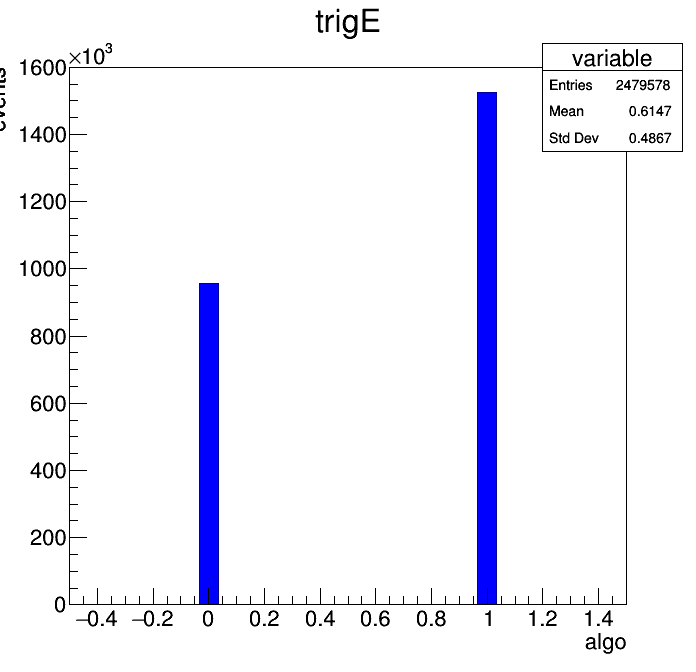

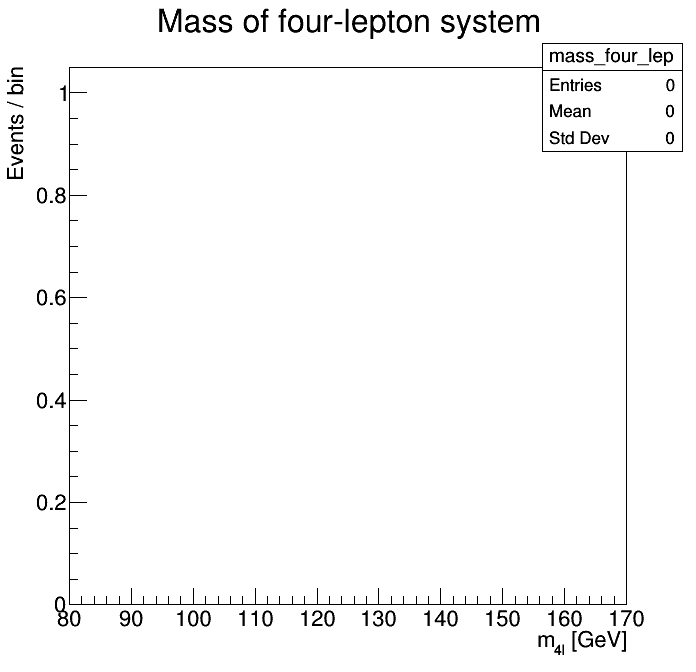

In [17]:
TCanvas *canvas = new TCanvas("c","c",10,10,700,700);
hist->Draw();
canvas->Draw();

TCanvas *canvas_1 = new TCanvas("c1","c1",10,10,700,700);
mass_four_lep->Draw();
canvas_1->Draw();